In [1]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('Downloads/data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

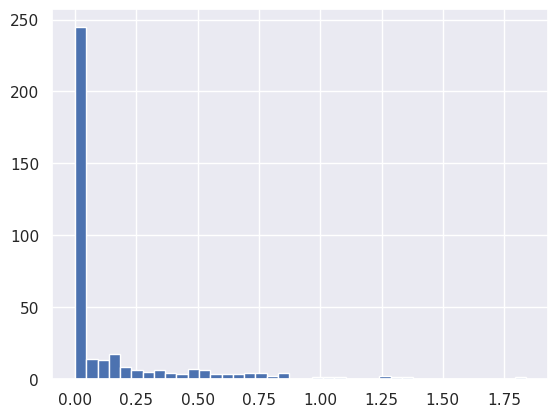

In [3]:
plt.hist(inches, 40);

In [4]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x


array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [5]:
np.count_nonzero(x < 6)

8

In [6]:
(x<6).sum()

8

In [7]:
np.sum(x < 6, axis = 1)

array([4, 2, 2])

In [8]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))


Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


In [9]:
rainy = (inches > 0)


# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches): ", np.max(inches[rainy]))


Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches):  1.8385826771653544


In [10]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

index = [3, 7, 4]
x[index]

[51 92 14 71 60 20 82 86 74 74]


array([71, 86, 60])

In [11]:
X = np.arange(12).reshape((3, 4))
print(X)
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])


mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]
# X[row[:, np.newaxis]]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [12]:
mean = [0, 0]
cov = [[1, 2], [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

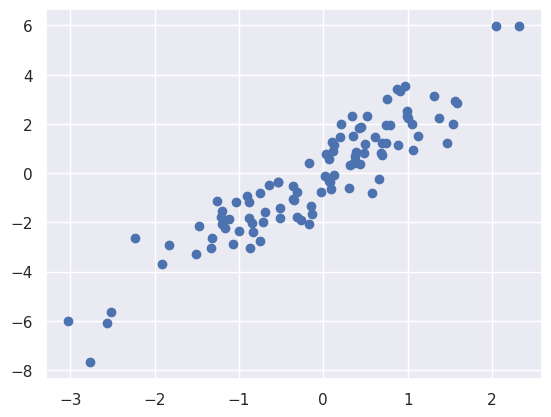

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [14]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices


array([34, 16, 38, 40, 61, 36, 62, 96, 46, 45, 85, 39, 65, 68, 75, 82,  2,
       57, 98, 32])

In [15]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

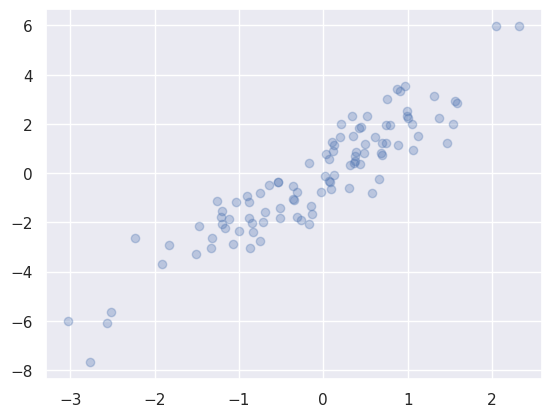

In [16]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:,0], selection[:, 1], facecolor='none', s=200)

In [17]:
x = np.zeros(10)
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

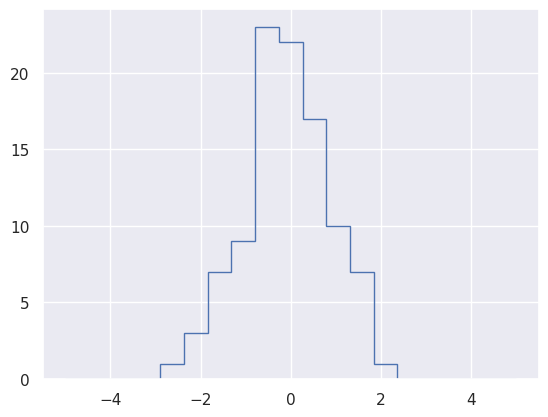

In [18]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)


i = np.searchsorted(bins, x)
np.add.at(counts, i, 1)

plt.hist(x, bins, histtype='step');

counts

In [19]:
counts = np.zeros_like(bins)
np.sum(i == 6)


3

In [20]:
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)


array([1, 2, 3, 4, 5])

In [21]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
i

array([1, 0, 3, 2, 4])

In [22]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [23]:
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [24]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [25]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

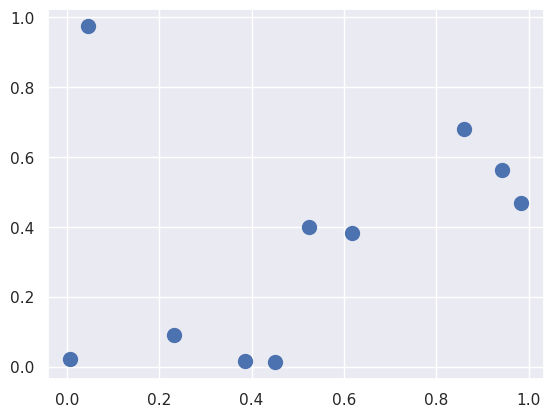

In [26]:
X = rand.rand(10, 2)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [27]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis] - X[np.newaxis]
differences.shape

(10, 10, 2)

In [28]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [29]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [30]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [32]:
for index, i  in enumerate(X):
    print(index, " : ", i)

0  :  [0.00706631 0.02306243]
1  :  [0.52477466 0.39986097]
2  :  [0.04666566 0.97375552]
3  :  [0.23277134 0.09060643]
4  :  [0.61838601 0.38246199]
5  :  [0.98323089 0.46676289]
6  :  [0.85994041 0.68030754]
7  :  [0.45049925 0.01326496]
8  :  [0.94220176 0.56328822]
9  :  [0.3854165  0.01596625]


In [33]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

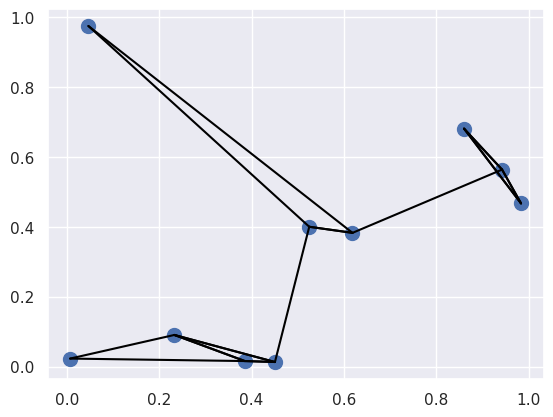

In [34]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')


In [35]:
import pandas as pd

population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area




California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [36]:
cols = ['population', 'area']
states = pd.DataFrame({'population': population,
                       'area': area})
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [37]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data



1    a
3    b
5    c
dtype: object

In [38]:
data.loc[3]

'b'

In [39]:
data.iloc[:3]

1    a
3    b
5    c
dtype: object

In [40]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [41]:
# data['pop']
# data.pop
data['density'] = data['pop'] / data['area']
data


,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [42]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [43]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [44]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')


In [45]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [46]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [47]:
x = pd.Series(range(5), dtype=int)
x[2] = None
x.dropna()

0    0.0
1    1.0
3    3.0
4    4.0
dtype: float64

In [48]:
data = pd.Series([1, np.nan, 'hello', None])

In [49]:
df = pd.DataFrame([[1,2,3,4,5,6],[1,2,3,4,5,6]])
df.shape

(2, 6)

In [50]:
X[np.newaxis].shape

(1, 10, 2)

In [51]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [52]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [53]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

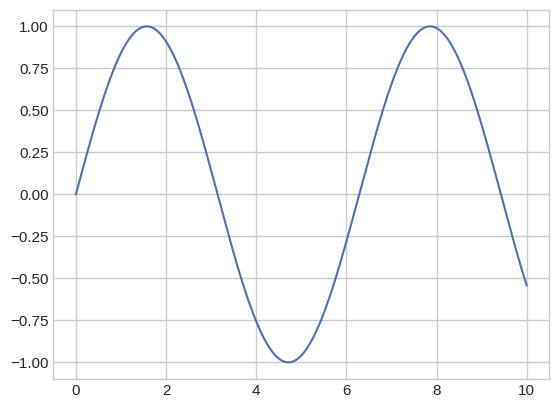

In [55]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

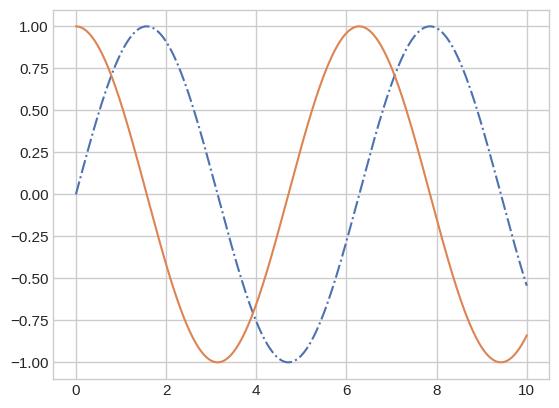

In [56]:
plt.plot(x, np.sin(x), linestyle='-.')
plt.plot(x, np.cos(x))
# plt.plot(x, np.tan(x))

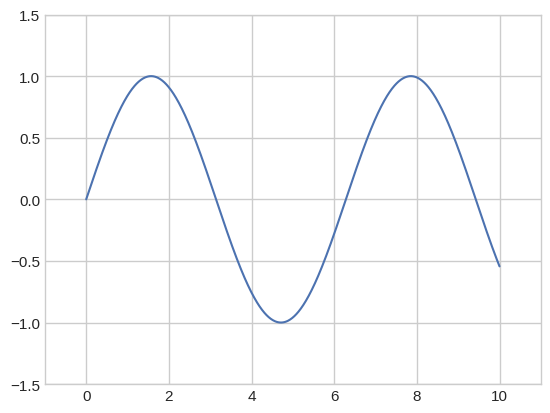

In [57]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

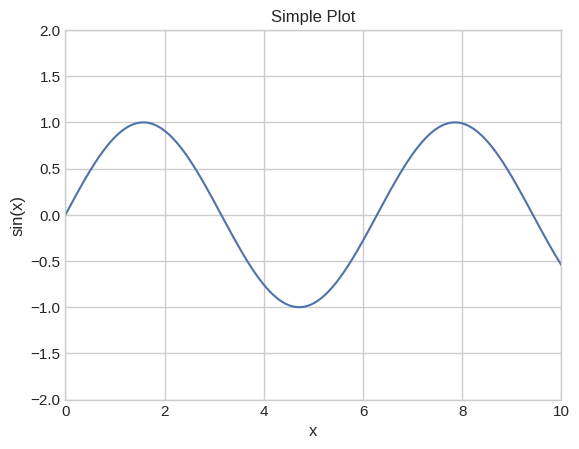

In [58]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='Simple Plot');

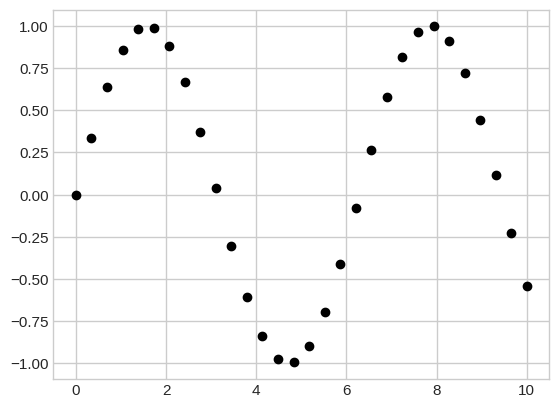

In [59]:


x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.scatter(x, y,color='black');



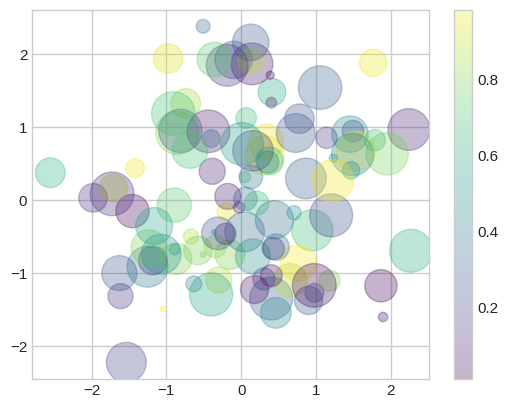

In [60]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

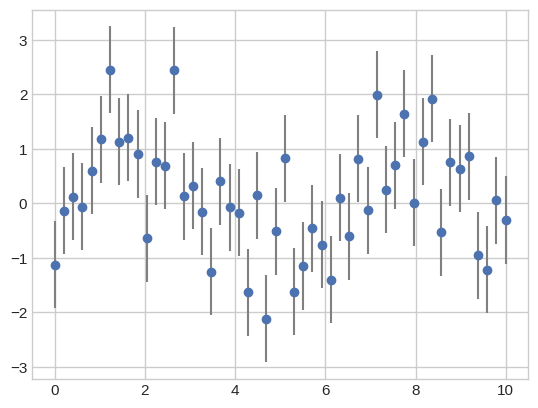

In [61]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', ecolor='gray');

In [62]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, y_std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(y_std)  # 2*sigma ~ 95% confidence region

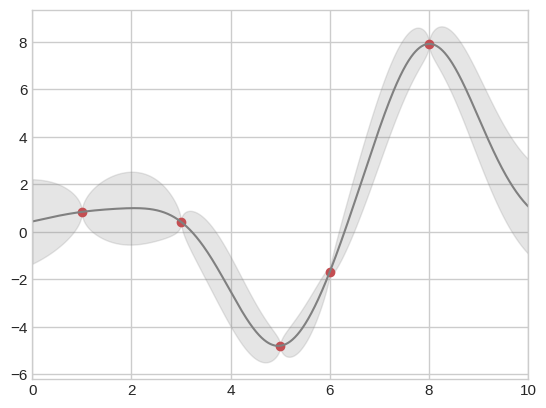

In [63]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

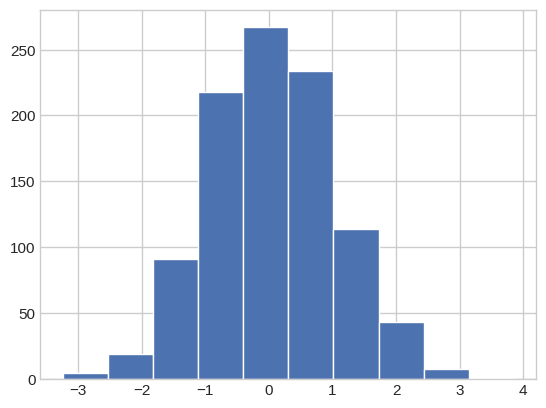

In [64]:
data = np.random.randn(1000)
plt.hist(data);


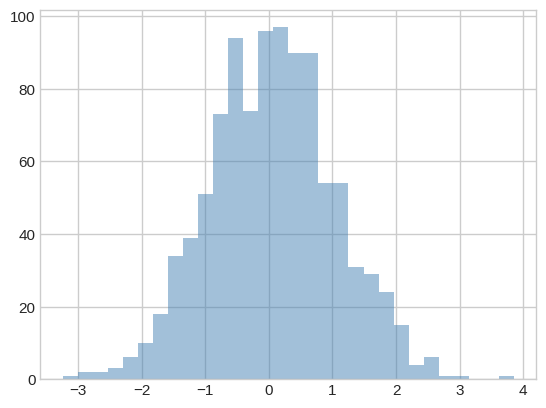

In [65]:
plt.hist(data, bins=30,alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

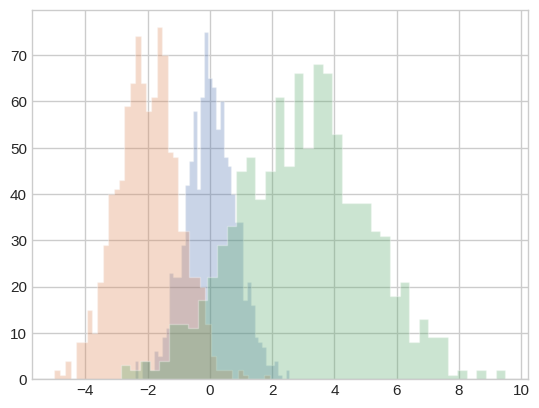

In [66]:


x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3,bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);



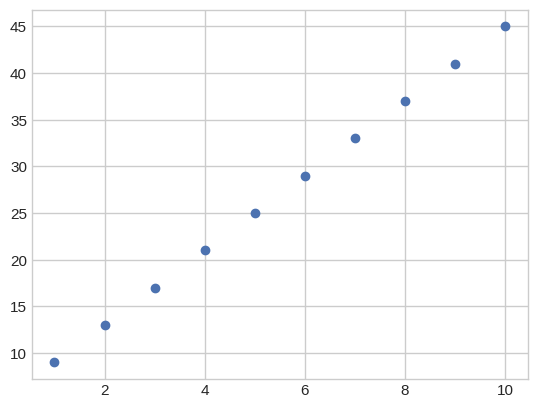

In [71]:
def foo(X):
    return 4*X + 5

X = np.arange(1,11,1)
Y = foo(X)
plt.scatter(X,Y)


In [88]:
num = np.dot((X - np.mean(X)),(Y))

den = np.dot((X - np.mean(X)),(X - np.mean(X)))

b1 =num / den

b0 = np.mean(Y) - b1 * np.mean(X)
b1, b0

(4.0, 5.0)

5.0